### Python Essentials Homework

#### Name List
* Jiayu ZHOU  
* Xiaochen YAN  
* Qinxuan ZHANG  
* Chang WANG  
* Shaobo ZHAO

In [70]:
#Q1 part1
def innerproduct(x_vals,y_vals):
    return sum(x*y for x,y in zip(x_vals,y_vals))
innerproduct((1,2,3),(3,2,1))

10

In [71]:
#part2
sum(x%2==0 for x in range(100))

50

In [72]:
#Q2
def p(x,coeff):
    return sum(n*x**m for m,n in enumerate(coeff))
p(1,(2,4))

6

In [74]:
#Q3
def capital(str):
    count=0
    for letter in str:
        if letter==letter.upper() and letter.isalpha():
            count+=1
    return count
capital('I live in China')

2

In [75]:
#Q4
def subset(seq_a,seq_b):
    subset=True
    for i in seq_a:
        if i not in seq_b:
            subset=False          
    return subset
subset((1,2,3),(1,2,3))

True

In [83]:
#Q5
def linapprox(f, a, b, n, x):
    """
    Evaluates the piecewise linear interpolant of f at x on the interval
    [a, b], with n evenly spaced grid points.

    Parameters
    ===========
        f : function
            The function to approximate

        x, a, b : scalars (floats or integers)
            Evaluation point and endpoints, with a <= x <= b

        n : integer
            Number of grid points

    Returns
    =========
        A float. The interpolant evaluated at x

    """
    length_of_interval = b - a
    num_subintervals = n - 1
    step = length_of_interval / num_subintervals

    # === find first grid point larger than x === #
    point = a
    while point <= x:
        point += step

    # === x must lie between the gridpoints (point - step) and point === #
    u, v = point - step, point

    return f(u) + (x - u) * (f(v) - f(u)) / (v - u)

In [76]:
#Q6
#use enumerate
l1=[1,3,5,2,1,6,8,0,3]
indice=[]
for i,j in enumerate(l1):
    if j%2==0:
        indice.append(i) 
indice    

[3, 5, 6, 7]

In [77]:
#use zip
l1=[1,3,5,2,1,6,8,0,3]
indice=[]
for i,j in zip(range(len(l1)),l1):
    if j%2==0:
        indice.append(i)
indice

[3, 5, 6, 7]

In [78]:
#Q7
l2=[1,3,5,2,7,10,0,2,3,0,1]
equal_to_zero=[]
not_equal_to_zero=[]
larger_than_mean=[]
smaller_than_mean=[]
for i,j in enumerate(l2):
    if j==0:
        equal_to_zero.append(i)
    else:
        not_equal_to_zero.append(i)
    if j > sum(l2)/len(l2):
        larger_than_mean.append(i)
    elif j< sum(l2)/len(l2):
        smaller_than_mean.append(i)
print(equal_to_zero)
print(not_equal_to_zero)
print(larger_than_mean)
print(smaller_than_mean)


[6, 9]
[0, 1, 2, 3, 4, 5, 7, 8, 10]
[2, 4, 5]
[0, 1, 3, 6, 7, 8, 9, 10]


In [79]:
#Q8
def exclusive(c1,c2):
    return ((c1 and not c2) or (c2 and not c1))
exclusive(1,1)

False

In [80]:
#Q9
import pandas as pd
s1=pd.Series(l1)
s2=pd.Series(l2)
print(all(s1!=0))
print(any(s2>2))

False
True


### Numpy Homework

In [69]:
#Q1
import numpy as np
def p(x,coeff):
    n=np.ones(len(coeff))*x
    n[0]=1
    return np.cumprod(n)@coeff
p(1,(2,4))

6.0

In [81]:
#Q2 vectorize to speed up
class discreteRV:
    """
    Generates an array of draws from a discrete random variable with vector of
    probabilities given by q.
    """

    def __init__(self, q):
        """
        The argument q is a NumPy array, or array like, nonnegative and sums
        to 1
        """
        self.q = q
        self.Q = cumsum(q)

    def draw(self, k=1):
        """
        Returns k draws from q. For each such draw, the value i is returned
        with probability q[i].
        """
        return self.Q.searchsorted(uniform(0, 1, size=k))        

In [82]:
#Q3
"""
Modifies ecdf.py from QuantEcon to add in a plot method

"""

class ECDF:
    """
    One-dimensional empirical distribution function given a vector of
    observations.

    Parameters
    ----------
    observations : array_like
        An array of observations

    Attributes
    ----------
    observations : array_like
        An array of observations

    """

    def __init__(self, observations):
        self.observations = np.asarray(observations)

    def __call__(self, x):
        """
        Evaluates the ecdf at x

        Parameters
        ----------
        x : scalar(float)
            The x at which the ecdf is evaluated

        Returns
        -------
        scalar(float)
            Fraction of the sample less than x

        """
        return np.mean(self.observations <= x)

    def plot(self, a=None, b=None):
        """
        Plot the ecdf on the interval [a, b].

        Parameters
        ----------
        a : scalar(float), optional(default=None)
            Lower end point of the plot interval
        b : scalar(float), optional(default=None)
            Upper end point of the plot interval

        """

        # === choose reasonable interval if [a, b] not specified === #
        if a is None:
            a = self.observations.min() - self.observations.std()
        if b is None:
            b = self.observations.max() + self.observations.std()

        # === generate plot === #
        x_vals = np.linspace(a, b, num=100)
        f = np.vectorize(self.__call__)
        plt.plot(x_vals, f(x_vals))
        plt.show()

In [12]:
#Q4
n=np.array((1,2,3,4,5))
#by array operations
print(np.var(n))
%time np.var(n)

2.0
Wall time: 0 ns


2.0

In [13]:
#by definition
m=(1,2,3,4,5)
print(sum((i-sum(m)/len(m))**2/len(m) for i in m))
%time sum((i-sum(m)/len(m))**2/len(m) for i in m)
#Actually the numpy should be faster. But the example is too short, so there is no difference.

2.0
Wall time: 0 ns


2.0

In [64]:
#Q5
A=np.random.normal(0,1,4)
A.shape=(2,2)
B=np.random.normal(0,1,4)
B.shape=(2,2)
C=np.random.normal(0,1,4)
C.shape=(2,2)
#Associative law: 
print("Associative law for matrix is {0}.".format(np.array_equal(((A@B)@C),A@(B@C))))
#Reverse order law: 
print("Reverse order law for matrix is {0}.".format(np.array_equal(((A@B).T),((B.T)@(A.T)))))

Associative law for matrix is False.
Reverse order law for matrix is True.


In [35]:
#Q6
a = np.random.uniform(0,1, (3, 3))
independent=np.array(a)
dependent=np.asarray(a)
#dependent copy is a pointer, but indenpendent copy is a true copy. When we change the dependent copy, original array will also change. 
#When we change the independent copy, the original array will not change.

array([[ 0.69643559,  0.61244047,  0.41359663],
       [ 0.75899396,  0.55264739,  0.55448825],
       [ 0.11232445,  0.13668291,  0.38366987]])

[[  9.86635786e-04]
 [  3.94264934e-03]
 [  8.85637464e-03]
 [  1.57084194e-02]
 [  2.44717419e-02]
 [  3.51117571e-02]
 [  4.75864738e-02]
 [  6.18466600e-02]
 [  7.78360372e-02]
 [  9.54915028e-02]
 [  1.14743379e-01]
 [  1.35515686e-01]
 [  1.57726447e-01]
 [  1.81288005e-01]
 [  2.06107374e-01]
 [  2.32086603e-01]
 [  2.59123163e-01]
 [  2.87110354e-01]
 [  3.15937724e-01]
 [  3.45491503e-01]
 [  3.75655056e-01]
 [  4.06309343e-01]
 [  4.37333383e-01]
 [  4.68604740e-01]
 [  5.00000000e-01]
 [  5.31395260e-01]
 [  5.62666617e-01]
 [  5.93690657e-01]
 [  6.24344944e-01]
 [  6.54508497e-01]
 [  6.84062276e-01]
 [  7.12889646e-01]
 [  7.40876837e-01]
 [  7.67913397e-01]
 [  7.93892626e-01]
 [  8.18711995e-01]
 [  8.42273553e-01]
 [  8.64484314e-01]
 [  8.85256621e-01]
 [  9.04508497e-01]
 [  9.22163963e-01]
 [  9.38153340e-01]
 [  9.52413526e-01]
 [  9.64888243e-01]
 [  9.75528258e-01]
 [  9.84291581e-01]
 [  9.91143625e-01]
 [  9.96057351e-01]
 [  9.99013364e-01]
 [  1.00000000e+00]


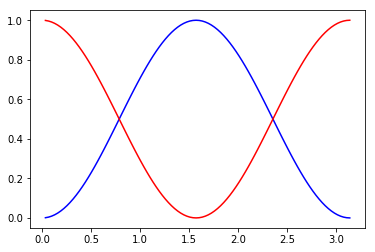

In [68]:
#Q7
x=np.ndarray(shape=(100,1),dtype=float,buffer=np.linspace(0.01,1,100)*np.pi)
print(np.sin(x)**2)
print(np.cos(x)**2)

import matplotlib.pyplot as plt
plt.plot(x,np.sin(x)**2,'b-')
plt.plot(x,np.cos(x)**2,'r-')
plt.show()

In [46]:
#Q8
#original code
import numpy as np
A = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
def f(x):
    return 1 if x % 5 == 0 else 0
f(A)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [48]:
#method1
import numpy as np
A = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
def f(x):
    return 1 if x % 5 == 0 else 0
f = np.vectorize(f)
f(A)

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1])

In [49]:
#method2
np.where(A%5==0, 1, 0) 

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1])